In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [40]:
var = 'chl'

title = f'Chl-a Prediction'
outpath = '/nobackup/jakravit/data/cyanosat/cases/plots/chl_12nm_3nm_rrs_scatter.png'

with open(f'/nobackup/jakravit/git/DE-WQ/experiments/cyanosat_{var}_12nm_3nm/test_cyanosat_{var}_12nm_3nm_results.pkl', 'rb') as f:
    full = pickle.load(f)

with open(f'/nobackup/jakravit/git/DE-WQ/experiments/cyanosat_{var}_12nm_3nm_p1/test_cyanosat_{var}_12nm_3nm_p1_results.pkl', 'rb') as f:
    p1 = pickle.load(f)
    
with open(f'/nobackup/jakravit/git/DE-WQ/experiments/cyanosat_{var}_12nm_3nm_p2/test_cyanosat_{var}_12nm_3nm_p2_results.pkl', 'rb') as f:
    p2 = pickle.load(f)

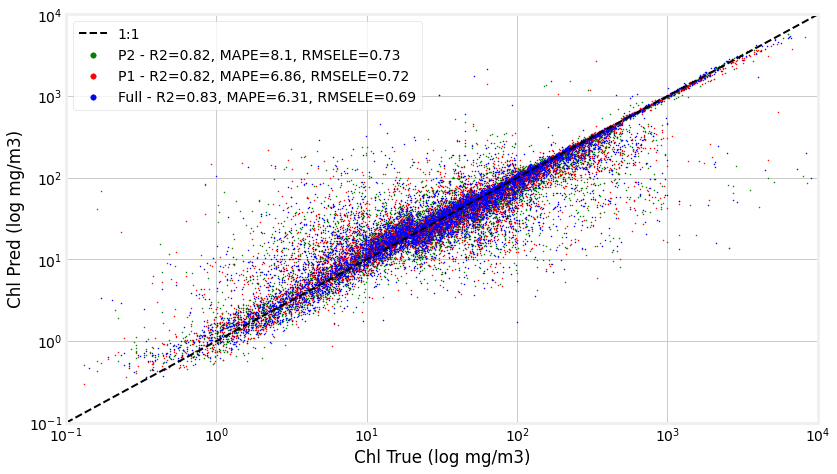

In [41]:
from matplotlib.colors import LogNorm

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

fig, ax = plt.subplots(figsize=(12,7),facecolor='white')
yt_full = full[var]['final']['ytest']
yh_full = full[var]['final']['yhat']
fullr2 = round(full[var]['final']['R2'][0],2)
fullmape = round(full[var]['final']['MAPE'][0],2)
fullrmsele = round(full[var]['final']['RMSE'][0],2)

yt_p1 = p1[var]['final']['ytest']
yh_p1 = p1[var]['final']['yhat']
p1r2 = round(p1[var]['final']['R2'][0],2)
p1mape = round(p1[var]['final']['MAPE'][0],2)
p1rmsele = round(p1[var]['final']['RMSE'][0],2)

yt_p2 = p2[var]['final']['ytest']
yh_p2 = p2[var]['final']['yhat']
p2r2 = round(p2[var]['final']['R2'][0],2)
p2mape = round(p2[var]['final']['MAPE'][0],2)
p2rmsele = round(p2[var]['final']['RMSE'][0],2)

ax.plot([.1, 10000], [.1, 10000], label='1:1', color='k', ls='--', lw=2)
ax.scatter(np.exp(yt_p2), np.exp(yh_p2), s=1, alpha=1, label=f'P2 - R2={p2r2}, MAPE={p2mape}, RMSELE={p2rmsele}', color='g')
ax.scatter(np.exp(yt_p1), np.exp(yh_p1), s=1, alpha=1, label=f'P1 - R2={p1r2}, MAPE={p1mape}, RMSELE={p1rmsele}', color='r')
ax.scatter(np.exp(yt_full), np.exp(yh_full), s=1, alpha=1, label=f'Full - R2={fullr2}, MAPE={fullmape}, RMSELE={fullrmsele}', color='b')


ax.set_xlim(.1,10000)
ax.set_ylim(.1,10000)
ax.set_xscale('log')
ax.set_yscale('log')

lg = ax.legend()
lg.legendHandles[1]._sizes = [30]
lg.legendHandles[2]._sizes = [30]
lg.legendHandles[3]._sizes = [30]

ax.set_xlabel('Chl True (log mg/m3)')
ax.set_ylabel('Chl Pred (log mg/m3)')

fig.savefig(outpath, bbox_inches='tight', dpi=300)
